In [6]:
# @markdown **[IMPORTANT]**

# @markdown Download packages and libraries before using the program
from __future__ import print_function
!pip install dna_features_viewer
from dna_features_viewer import GraphicFeature, GraphicRecord,CircularGraphicRecord

import ipywidgets as widgets
from ipywidgets import HBox, VBox

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Se carga la base de datos
!gdown --id 186JwRyTyhQQXiD9LK2WJt0msBHJH57cX
database = 'Database.csv'


d1 = {
    'prokaryote': {   
        'prom' :{
            'fullpro':{},
            'minpro':{}
            },

        'RBS':{},
        'term':{}
},
    'eukaryote(mammal)' : {   
        'prom' :{
            'fullpro':{},
            'minpro':{}
            },

        'RBS':{},
        'term':{}
},
      'eukaryote(plant)':{   
        'prom' :{
            'fullpro':{},
            'minpro':{}
            },

        'RBS':{},
        'gene':{},
        'other':{},
        'term':{}
}, 'box':{}

}



import csv
with open(database, 'r') as file:
    reader = csv.reader(file)
    
    for row in reader:
      row[4]= row[4].upper()
      if row[1] == 'prokaryote':
        if row[3] == 'fullpro':
          d1['prokaryote']['prom']['fullpro'][row[0]] = row[4]
        elif row[3] == 'minpro':
          d1['prokaryote']['prom']['minpro'][row[0]] = row[4]
        elif row[3] == 'RBS':
          d1['prokaryote']['RBS'][row[0]] = row[4]
        elif row[3] == 'terminator':
          d1['prokaryote']['term'][row[0]] = row[4]

      elif row[2] == 'plant':
          if row[3] == 'fullpro':
            d1['eukaryote(plant)']['prom']['fullpro'][row[0]] = row[4]
          elif row[3] == 'minpro':
            d1['eukaryote(plant)']['prom']['minpro'][row[0]] = row[4]
          elif row[3] == 'RBS':
            d1['eukaryote(plant)']['RBS'][row[0]] = row[4]
          elif row[3] == 'terminator':
            d1['eukaryote(plant)']['term'][row[0]] = row[4]

          elif row[3] == 'gene':
            d1['eukaryote(plant)']['gene'][row[0] ] = row[4]

          elif row[3] == 'other':
            d1['eukaryote(plant)']['other'][row[0] ] = row[4]


      elif row[2] == 'mammal':
        if row[3] == 'fullpro':
            d1['eukaryote(mammal)']['prom']['fullpro'][row[0]] = row[4]
        elif row[3] == 'minpro':
          d1['eukaryote(mammal)']['prom']['minpro'][row[0]] = row[4]
        elif row[3] == 'RBS':
          d1['eukaryote(mammal)']['RBS'][row[0]] = row[4]
        elif row[3] == 'terminator':
          d1['eukaryote(mammal)']['term'][row[0]] = row[4]


      if row[3] == 'box':
        d1['box'][row[0]] = row[4]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 3.3 MB/s 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=186JwRyTyhQQXiD9LK2WJt0msBHJH57cX
To: /content/Database.csv
100% 13.7k/13.7k [00:00<00:00, 18.3MB/s]


# Protocol

1. First Step: Choose or type your promoter sequence
2. Second Step: Choose or type your ribosome binding sequence (RBS) if apply
3. Third Step: Type your gene sequence sequence
4. Fourth Step: Choose or type your terminator sequence

## Some tips:

- If you do not find the sequence you want to work with, select the Free option.
- Do not forget to press the OK button at every stage.

# Prokaryote

In [9]:
# @markdown # Run to show widget
# @markdown Select the components for your promoter and do not forget to press OK


# ------------------------SELECTION-----------------------------------------------------------
ch_fullW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_minW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

# PROMOTER SECTION ####################################################################

# ##################################################################Constitutive Option

tab_promoter_constitutiveW = widgets.Dropdown(
    options= d1['prokaryote']['prom']['fullpro'].keys(),
    description='Full:',
    disabled = False
)

#     To join previous optionsselect_promoter
tab_promoter_constitutive = HBox(children=[ch_fullW,
                                           tab_promoter_constitutiveW])

# #######################################################################Inducible Option
tab_promoter_inducible_boxW = widgets.Dropdown(
    options=d1['box'].keys(),
    description='Box:',
    disabled = False)


tab_promoter_inducible_minpromoterW = widgets.Dropdown(
    options=d1['prokaryote']['prom']['minpro'].keys(),
    #rows=10,
    description='Minimun:',
    disabled = False
)


#     To join previous optionsselect_promoter
tab_promoter_inducible = HBox(children=[ch_minW,
                                         tab_promoter_inducible_boxW,
                                        tab_promoter_inducible_minpromoterW])

# #######################################################################    Free Option
tab_promoter_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_promoter_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)




tab_promoter_free = HBox([ch_freeW,
                                        tab_promoter_free_nameW,
                                        tab_promoter_free_seqW])



tab2 = widgets.Accordion(children=[tab_promoter_constitutive,
                                    tab_promoter_inducible,
                                    tab_promoter_free])

tab2.set_title(0, 'Full Promoter')
tab2.set_title(1, 'Min Promoter')
tab2.set_title(2, 'Free')


# RBS ####################################################################

ch_RBS_optionsW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_RBS_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

# ---------------------------------------------------------------------------

tab_RBS_selectionW = widgets.Dropdown(
    options=d1['prokaryote']['RBS'].keys(),
    #rows=10,
    description='Select Box:',
    disabled=False
)


tab_RBS_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_RBS_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)


RBS_list = HBox([ch_RBS_optionsW, tab_RBS_selectionW ])
RBS_free = HBox([ch_RBS_freeW, tab_RBS_free_nameW, tab_RBS_free_seqW  ])

tab_RBS = VBox([RBS_list , RBS_free])

# GENE SELECTION ####################################################################

ch_gene_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)


tab_gene_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_gene_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)

tab_gene = HBox([ch_gene_freeW , tab_gene_free_nameW , tab_gene_free_seqW])

# TERMINATOR SELECTION ####################################################################

ch_term_optionsW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_term_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

# ---------------------------------------------------------------------------

tab_term_selectionW = widgets.Dropdown(
    options=d1['prokaryote']['term'].keys(),
    #rows=10,
    description='Terminator:',
    disabled=False
)


tab_term_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_term_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)


term_list = HBox([ch_term_optionsW, tab_term_selectionW ])
term_free = HBox([ch_term_freeW, tab_term_free_nameW, tab_term_free_seqW  ])

tab_terminator = VBox([term_list , term_free])






###########################################################  FINAL FUNCTION

def function_promoter(ch_full, 
                      ch_min, 
                      ch_free,
                      tab_promoter_constitutive,
                      tab_promoter_inducible_box,
                      tab_promoter_inducible_minpromoter,
                      tab_promoter_free_name,
                      tab_promoter_free_seq,
                      
                      ch_RBS_options ,
                      ch_RBS_free ,
                      tab_RBS_selection ,
                      tab_RBS_free_name,
                      tab_RBS_free_seq,
                      
                      ch_gene_free,
                      tab_gene_free_name,
                      tab_gene_free_seq,
                      
                      ch_term_options ,
                      ch_term_free ,
                      tab_term_selection ,
                      tab_term_free_name,
                      tab_term_free_seq):

  name_promoter = ['']
  seq_promoter = ['']

  name_RBS = ['']
  seq_RBS = ['']

  name_gene = ['']  
  seq_gene = ['']

  name_term  = ['']
  seq_term = ['']
  
  # ------------------PROMOTER--------------------------------------------------
  if ch_full == True and ch_min == False and ch_free == False:
    seq_promoter = [d1['prokaryote']['prom']['fullpro'][tab_promoter_constitutive]]
    name_promoter = [tab_promoter_constitutive]
    
    type_promoter = ['full promoter']

  elif ch_full == False and ch_min == True and ch_free == False:
    name_promoter = [tab_promoter_inducible_box , tab_promoter_inducible_minpromoter]


    seq_promoter = [ d1['box'][tab_promoter_inducible_box] ,  
                    d1['prokaryote']['prom']['minpro'][tab_promoter_inducible_minpromoter]]
    type_promoter = ['box', 'minimun promoter']
  
  elif ch_full == False and ch_min == False and ch_free == True:
    name_promoter = [tab_promoter_free_name]
    seq_promoter = [tab_promoter_free_seq]
    type_promoter = ['full promoter']

  else:
    name_promoter = ['']
    seq_promoter = ['']
    type_promoter = ['']

  # ------------------RBS--------------------------------------------------
  if ch_RBS_options == True and ch_RBS_free == False :
    name_RBS = [tab_RBS_selection]
    seq_RBS = [d1['prokaryote']['RBS'][tab_RBS_selection]]
    type_RBS = ['RBS']

  elif ch_RBS_options == False and ch_RBS_free == True:
    name_RBS = [tab_RBS_free_name]
    seq_RBS = [tab_RBS_free_seq] 
    type_RBS = ['RBS']

  else:
    name_RBS  = ['']
    seq_RBS = ['']
    type_RBS = ['']



  # ------------------Gene--------------------------------------------------
  
  if ch_gene_free == True:
    name_gene = [tab_gene_free_name]  
    seq_gene = [tab_gene_free_seq]
    type_gene = ['gene']
  else:
    name_gene = []  
    seq_gene = []
    type_gene = []


  # ------------------TERMINATOR--------------------------------------------------
  if ch_term_options == True and ch_term_free == False :
    name_term = [tab_term_selection]
    seq_term = [d1['prokaryote']['term'][tab_term_selection]]
    type_term = ['terminator']

  elif ch_term_options == False and ch_term_free == True:
    name_term = [tab_term_free_name]
    seq_term = [tab_term_free_seq]
    type_term = ['terminator']

  else:
    name_term  = ['']
    seq_term = ['']
    type_term = ['']


  X = name_promoter + name_RBS + name_gene +  name_term 
  Y = seq_promoter + seq_RBS + seq_gene +    seq_term
  Z = type_promoter + type_RBS  + type_gene + type_term
  
  print(X,Y,Z)

  return X,Y,Z




pro = widgets.interactive(function_promoter, 

                        ch_full = ch_fullW,
                        ch_min = ch_minW ,
                        ch_free = ch_freeW, 

                        tab_promoter_constitutive = tab_promoter_constitutiveW,
                        tab_promoter_inducible_box = tab_promoter_inducible_boxW,
                        tab_promoter_inducible_minpromoter = tab_promoter_inducible_minpromoterW,
                        
                        tab_promoter_free_name = tab_promoter_free_nameW,
                        tab_promoter_free_seq = tab_promoter_free_seqW,
                        
                        
                        ch_RBS_options = ch_RBS_optionsW,
                        ch_RBS_free = ch_RBS_freeW,
                        tab_RBS_selection = tab_RBS_selectionW,
                        tab_RBS_free_name = tab_RBS_free_nameW,
                        tab_RBS_free_seq = tab_RBS_free_seqW,
                        
                        ch_gene_free = ch_gene_freeW,
                        tab_gene_free_name = tab_gene_free_nameW,
                        tab_gene_free_seq = tab_gene_free_seqW,

                        ch_term_options = ch_term_optionsW,
                        ch_term_free = ch_term_freeW,
                        tab_term_selection = tab_term_selectionW,
                        tab_term_free_name = tab_term_free_nameW,
                        tab_term_free_seq = tab_term_free_seqW,
                        )



# TABS ASIGNMENT

tab3 = tab_RBS
tab4 = tab_gene
tab5 = tab_terminator

# Creation to visualizase
tab_nest = widgets.Tab()
tab_nest.children = [ tab2, tab3, tab4, tab5] # Agrupar Tabs
tab_nest.set_title(0, 'Promoter')
tab_nest.set_title(1, 'RBS')
tab_nest.set_title(2, 'Gene')
tab_nest.set_title(3, 'Terminator')
tab_nest # Mostrar Tab

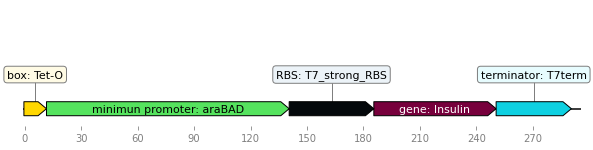

In [10]:
# @markdown # Genetic Assembly
# @markdown Run this section to plot your sequence


def plot_seq(name,seq, btype):

  colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

  length = []
  
  for i in seq:
    length.append(len(i)) 

  features = []
  
  ginitio = 0


  for i in range(len(name)):
    gfinal =  ginitio + len(seq[i]) -1
    features= features + [GraphicFeature(start = ginitio, 
                             end   = gfinal, 
                             strand= +1, 
                             color=colors[i],
                             label= str(btype[i])+": " + name[i])]
    ginitio = gfinal

  record = GraphicRecord(sequence_length=sum(length), features=features)
  record.plot(figure_width=10)

name_pro = [x for x in pro.result[0] if x.strip()]
sequence_pro = [x for x in pro.result[1] if x.strip()]
type_pro = [x for x in pro.result[2] if x.strip()]
plot_seq(name_pro,sequence_pro,type_pro)

In [11]:
# @markdown # GeneBank (.GB) file format
# @markdown Your sequence is ready! Copy this text and save it in a .gb file so you can view and work with it in SnapGene

name_seq = name_pro
dna_seq = sequence_pro
type_seq = type_pro

colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

full_seq = "".join(dna_seq)
full_name_seq = "_".join(name_seq)

head = ["LOCUS"+"     "+full_name_seq+" "+str(len(full_seq))+" bp ds-DNA     linear",
          "DEFINITION",
          "FEATURES                   Location/Qualifiers"]

def block(type_element, name, pi, pf, col):

  space = " "*(21-len(type_element))
  
  element = ["    "+ str(type_element)+space+str(pi)+".."+str(pf),
             "                         "+"/label="+  str(name),
             "                         "+"/ApEinfo_revcolor="+ str(col),
             "                         "+"/ApEinfo_fwdcolor="+str(col),
             '']
  
  for i in element:
    print(i)
  return element

def split10(s1):
  s10 = [(s1[i:i+10]) for i in range(0, len(s1), 10)]
  srow = " ".join(s10)
  return srow

def origin(seq):

  origin_list = []
  s60 = [(seq[i:i+60]) for i in range(0, len(seq), 60)]

  n = 0
  for i in s60:
    index = n*60 + 1
    space_index = str(index) + " "*(5-len(str(index)))  

    line = space_index + "  "+  split10(i)

    origin_list.append(line)
    print(line)
    n = n+1

  #return origin_list


#with open('/content/drive/MyDrive/Ciclo 9/AutoPython/Archivos Importantes/Example1.gbtxt', 'w') as writefile:
#    writefile.write("This is line A\n")
#    writefile.write("This is line B\n")

for i in head:
  print(i)

pinitio = 1
for i in range(len(dna_seq)):
  
  pfinal =  pinitio + len(dna_seq[i]) -1
  block(type_seq[i], name_seq[i],pinitio, pfinal, colors[i])
  pinitio = pfinal+1

print("ORIGIN")
origin(full_seq)


LOCUS     Tet-O_araBAD_T7_strong_RBS_Insulin_T7term 296 bp ds-DNA     linear
DEFINITION
FEATURES                   Location/Qualifiers
    box                  1..13
                         /label=Tet-O
                         /ApEinfo_revcolor=#FFD700
                         /ApEinfo_fwdcolor=#FFD700

    minimun promoter     14..143
                         /label=araBAD
                         /ApEinfo_revcolor=#55E35E
                         /ApEinfo_fwdcolor=#55E35E

    RBS                  144..189
                         /label=T7_strong_RBS
                         /ApEinfo_revcolor=#04080B
                         /ApEinfo_fwdcolor=#04080B

    gene                 190..255
                         /label=Insulin
                         /ApEinfo_revcolor=#77003C
                         /ApEinfo_fwdcolor=#77003C

    terminator           256..296
                         /label=T7term
                         /ApEinfo_revcolor=#0ED0E1
                         /ApEinfo_

# Plants

In [23]:
# @markdown # Run to show widget
# @markdown Select the components for your promoter and do not forget to press OK


# ------------------------SELECTION-----------------------------------------------------------
ch_fullW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_minW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

# PROMOTER SECTION ####################################################################

# ##################################################################Constitutive Option

tab_promoter_constitutiveW = widgets.Dropdown(
    options= d1['eukaryote(plant)']['prom']['fullpro'].keys(),
    description='Full:',
    disabled = False
)

#     To join previous optionsselect_promoter
tab_promoter_constitutive = HBox(children=[ch_fullW,
                                           tab_promoter_constitutiveW])

# #######################################################################Inducible Option
tab_promoter_inducible_boxW = widgets.Dropdown(
    options=d1['box'].keys(),
    description='Box:',
    disabled = False)


tab_promoter_inducible_minpromoterW = widgets.Dropdown(
    options=d1['eukaryote(plant)']['prom']['minpro'].keys(),
    #rows=10,
    description='Minimun:',
    disabled = False
)


#     To join previous optionsselect_promoter
tab_promoter_inducible = HBox(children=[ch_minW,
                                         tab_promoter_inducible_boxW,
                                        tab_promoter_inducible_minpromoterW])

# #######################################################################    Free Option
tab_promoter_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_promoter_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)




tab_promoter_free = HBox([ch_freeW,
                                        tab_promoter_free_nameW,
                                        tab_promoter_free_seqW])



tab2 = widgets.Accordion(children=[tab_promoter_constitutive,
                                    tab_promoter_inducible,
                                    tab_promoter_free])

tab2.set_title(0, 'Full Promoter')
tab2.set_title(1, 'Min Promoter')
tab2.set_title(2, 'Free')



# GENE SELECTION ####################################################################

ch_gene_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)


tab_gene_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_gene_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)

tab_gene = HBox([ch_gene_freeW , tab_gene_free_nameW , tab_gene_free_seqW])

# TERMINATOR SELECTION ####################################################################

ch_term_optionsW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_term_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

# ---------------------------------------------------------------------------

tab_term_selectionW = widgets.Dropdown(
    options=d1['eukaryote(plant)']['term'].keys(),
    #rows=10,
    description='Terminator:',
    disabled=False
)


tab_term_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_term_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)


term_list = HBox([ch_term_optionsW, tab_term_selectionW ])
term_free = HBox([ch_term_freeW, tab_term_free_nameW, tab_term_free_seqW  ])

tab_terminator = VBox([term_list , term_free])






###########################################################  FINAL FUNCTION

def function_promoter(ch_full, 
                      ch_min, 
                      ch_free,
                      tab_promoter_constitutive,
                      tab_promoter_inducible_box,
                      tab_promoter_inducible_minpromoter,
                      tab_promoter_free_name,
                      tab_promoter_free_seq,
                                           
                      ch_gene_free,
                      tab_gene_free_name,
                      tab_gene_free_seq,
                      
                      ch_term_options ,
                      ch_term_free ,
                      tab_term_selection ,
                      tab_term_free_name,
                      tab_term_free_seq):

  name_promoter = ['']
  seq_promoter = ['']



  name_gene = ['']  
  seq_gene = ['']

  name_term  = ['']
  seq_term = ['']
  
  # ------------------PROMOTER--------------------------------------------------
  if ch_full == True and ch_min == False and ch_free == False:
    seq_promoter = [d1['eukaryote(plant)']['prom']['fullpro'][tab_promoter_constitutive]]
    name_promoter = [tab_promoter_constitutive]
    
    type_promoter = ['full promoter']

  elif ch_full == False and ch_min == True and ch_free == False:
    name_promoter = [tab_promoter_inducible_box , tab_promoter_inducible_minpromoter]


    seq_promoter = [ d1['box'][tab_promoter_inducible_box] ,  
                    d1['eukaryote(plant)']['prom']['minpro'][tab_promoter_inducible_minpromoter]]
    type_promoter = ['box', 'minimun promoter']
  
  elif ch_full == False and ch_min == False and ch_free == True:
    name_promoter = [tab_promoter_free_name]
    seq_promoter = [tab_promoter_free_seq]
    type_promoter = ['full promoter']

  else:
    name_promoter = ['']
    seq_promoter = ['']
    type_promoter = ['']

  # ------------------Gene--------------------------------------------------
  
  if ch_gene_free == True:
    name_gene = [tab_gene_free_name]  
    seq_gene = [tab_gene_free_seq]
    type_gene = ['gene']
  else:
    name_gene = []  
    seq_gene = []
    type_gene = []


  # ------------------TERMINATOR--------------------------------------------------
  if ch_term_options == True and ch_term_free == False :
    name_term = [tab_term_selection]
    seq_term = [d1['eukaryote(plant)']['term'][tab_term_selection]]
    type_term = ['terminator']

  elif ch_term_options == False and ch_term_free == True:
    name_term = [tab_term_free_name]
    seq_term = [tab_term_free_seq]
    type_term = ['terminator']

  else:
    name_term  = ['']
    seq_term = ['']
    type_term = ['']


  X = name_promoter  + name_gene +  name_term 
  Y = seq_promoter  + seq_gene +    seq_term
  Z = type_promoter   + type_gene + type_term
  
  print(X,Y,Z)

  return X,Y,Z




plant = widgets.interactive(function_promoter, 

                        ch_full = ch_fullW,
                        ch_min = ch_minW ,
                        ch_free = ch_freeW, 

                        tab_promoter_constitutive = tab_promoter_constitutiveW,
                        tab_promoter_inducible_box = tab_promoter_inducible_boxW,
                        tab_promoter_inducible_minpromoter = tab_promoter_inducible_minpromoterW,
                        
                        tab_promoter_free_name = tab_promoter_free_nameW,
                        tab_promoter_free_seq = tab_promoter_free_seqW,
                        
                        ch_gene_free = ch_gene_freeW,
                        tab_gene_free_name = tab_gene_free_nameW,
                        tab_gene_free_seq = tab_gene_free_seqW,

                        ch_term_options = ch_term_optionsW,
                        ch_term_free = ch_term_freeW,
                        tab_term_selection = tab_term_selectionW,
                        tab_term_free_name = tab_term_free_nameW,
                        tab_term_free_seq = tab_term_free_seqW
                        )



# TABS ASIGNMENT
tab4 = tab_gene
tab5 = tab_terminator

# Creation to visualizase
tab_nest = widgets.Tab()
tab_nest.children = [ tab2, tab4, tab5] # Agrupar Tabs
tab_nest.set_title(0, 'Promoter')
tab_nest.set_title(1, 'Gene')
tab_nest.set_title(2, 'Terminator')
tab_nest # Mostrar Tab

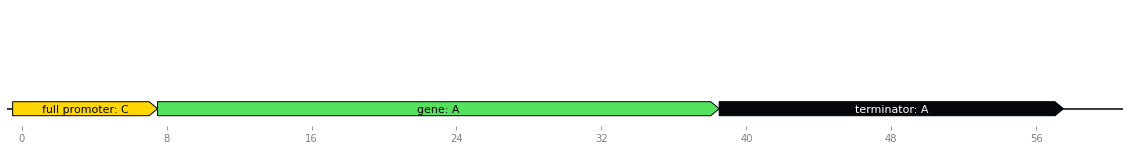

In [24]:
# @markdown # Genetic Assembly
# @markdown Run this section to plot your sequence


def plot_seq(name,seq, btype):

  colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

  length = []
  
  for i in seq:
    length.append(len(i)) 

  features = []
  
  ginitio = 0


  for i in range(len(name)):
    gfinal =  ginitio + len(seq[i]) -1
    features= features + [GraphicFeature(start = ginitio, 
                             end   = gfinal, 
                             strand= +1, 
                             color=colors[i],
                             label= str(btype[i])+": " + name[i])]
    ginitio = gfinal

  record = GraphicRecord(sequence_length=sum(length), features=features)
  record.plot(figure_width=20)

    


names_plant = [x for x in plant.result[0] if x.strip()]
sequences_plant = [x for x in plant.result[1] if x.strip()]
types_plant = [x for x in plant.result[2] if x.strip()]



plot_seq(names_plant,sequences_plant,types_plant)

In [25]:
# @markdown # .GB file format
# @markdown Your sequence is ready! Copy this text and save it in a .gb file so you can view and work with it in SnapGene


name_seq = plant.result[0]
dna_seq = plant.result[1]
type_seq = plant.result[2] 

colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

full_seq = "".join(dna_seq)
full_name_seq = "_".join(name_seq)

head = ["LOCUS"+"     "+full_name_seq+" "+str(len(full_seq))+" bp ds-DNA     linear",
          "DEFINITION",
          "FEATURES                   Location/Qualifiers"]

def block(type_element, name, pi, pf, col):

  space = " "*(21-len(type_element))
  
  element = ["    "+ str(type_element)+space+str(pi)+".."+str(pf),
             "                         "+"/label="+  str(name),
             "                         "+"/ApEinfo_revcolor="+ str(col),
             "                         "+"/ApEinfo_fwdcolor="+str(col),
             '']
  
  for i in element:
    print(i)
  return element

def split10(s1):
  s10 = [(s1[i:i+10]) for i in range(0, len(s1), 10)]
  srow = " ".join(s10)
  return srow

def origin(seq):

  origin_list = []
  s60 = [(seq[i:i+60]) for i in range(0, len(seq), 60)]

  n = 0
  for i in s60:
    index = n*60 + 1
    space_index = str(index) + " "*(5-len(str(index)))  

    line = space_index + "  "+  split10(i)

    origin_list.append(line)
    print(line)
    n = n+1

  #return origin_list


#with open('/content/drive/MyDrive/Ciclo 9/AutoPython/Archivos Importantes/Example1.gbtxt', 'w') as writefile:
#    writefile.write("This is line A\n")
#    writefile.write("This is line B\n")

for i in head:
  print(i)

pinitio = 1
for i in range(len(dna_seq)):
  
  pfinal =  pinitio + len(dna_seq[i]) -1
  block(type_seq[i], name_seq[i],pinitio, pfinal, colors[i])
  pinitio = pfinal+1

print("ORIGIN")
origin(full_seq)


LOCUS     C_A_A 61 bp ds-DNA     linear
DEFINITION
FEATURES                   Location/Qualifiers
    full promoter        1..9
                         /label=C
                         /ApEinfo_revcolor=#FFD700
                         /ApEinfo_fwdcolor=#FFD700

    gene                 10..41
                         /label=A
                         /ApEinfo_revcolor=#55E35E
                         /ApEinfo_fwdcolor=#55E35E

    terminator           42..61
                         /label=A
                         /ApEinfo_revcolor=#04080B
                         /ApEinfo_fwdcolor=#04080B

ORIGIN
1      AAATTTAAAG GGGGGGGGGG GGGGGGGGGG GGGGGGGGGG GCTTTTTTTT TTTTTTTTTT
61     T


# Mammals

In [16]:
# @markdown # Run to show widget
# @markdown Select the components for your promoter and do not forget to press OK


# ------------------------SELECTION-----------------------------------------------------------
ch_fullW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_minW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

# PROMOTER SECTION ####################################################################

# ##################################################################Constitutive Option

tab_promoter_constitutiveW = widgets.Dropdown(
    options= d1['eukaryote(mammal)']['prom']['fullpro'].keys(),
    description='Full:',
    disabled = False
)

#     To join previous optionsselect_promoter
tab_promoter_constitutive = HBox(children=[ch_fullW,
                                           tab_promoter_constitutiveW])

# #######################################################################Inducible Option
tab_promoter_inducible_boxW = widgets.Dropdown(
    options=d1['box'].keys(),
    description='Box:',
    disabled = False)


tab_promoter_inducible_minpromoterW = widgets.Dropdown(
    options=d1['eukaryote(mammal)']['prom']['minpro'].keys(),
    #rows=10,
    description='Minimun:',
    disabled = False
)


#     To join previous optionsselect_promoter
tab_promoter_inducible = HBox(children=[ch_minW,
                                         tab_promoter_inducible_boxW,
                                        tab_promoter_inducible_minpromoterW])

# #######################################################################    Free Option
tab_promoter_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_promoter_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)




tab_promoter_free = HBox([ch_freeW,
                                        tab_promoter_free_nameW,
                                        tab_promoter_free_seqW])



tab2 = widgets.Accordion(children=[tab_promoter_constitutive,
                                    tab_promoter_inducible,
                                    tab_promoter_free])

tab2.set_title(0, 'Full Promoter')
tab2.set_title(1, 'Min Promoter')
tab2.set_title(2, 'Free')



# GENE SELECTION ####################################################################

ch_gene_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)


tab_gene_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_gene_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)

tab_gene = HBox([ch_gene_freeW , tab_gene_free_nameW , tab_gene_free_seqW])

# TERMINATOR SELECTION ####################################################################

ch_term_optionsW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_term_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

# ---------------------------------------------------------------------------

tab_term_selectionW = widgets.Dropdown(
    options=d1['eukaryote(mammal)']['term'].keys(),
    #rows=10,
    description='Terminator:',
    disabled=False
)


tab_term_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_term_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)


term_list = HBox([ch_term_optionsW, tab_term_selectionW ])
term_free = HBox([ch_term_freeW, tab_term_free_nameW, tab_term_free_seqW  ])

tab_terminator = VBox([term_list , term_free])






###########################################################  FINAL FUNCTION

def function_promoter(ch_full, 
                      ch_min, 
                      ch_free,
                      tab_promoter_constitutive,
                      tab_promoter_inducible_box,
                      tab_promoter_inducible_minpromoter,
                      tab_promoter_free_name,
                      tab_promoter_free_seq,
                                           
                      ch_gene_free,
                      tab_gene_free_name,
                      tab_gene_free_seq,
                      
                      ch_term_options ,
                      ch_term_free ,
                      tab_term_selection ,
                      tab_term_free_name,
                      tab_term_free_seq):

  name_promoter = ['']
  seq_promoter = ['']



  name_gene = ['']  
  seq_gene = ['']

  name_term  = ['']
  seq_term = ['']
  
  # ------------------PROMOTER--------------------------------------------------
  if ch_full == True and ch_min == False and ch_free == False:
    seq_promoter = [d1['eukaryote(mammal)']['prom']['fullpro'][tab_promoter_constitutive]]
    name_promoter = [tab_promoter_constitutive]
    
    type_promoter = ['full promoter']

  elif ch_full == False and ch_min == True and ch_free == False:
    name_promoter = [tab_promoter_inducible_box , tab_promoter_inducible_minpromoter]


    seq_promoter = [ d1['box'][tab_promoter_inducible_box] ,  
                    d1['eukaryote(mammal)']['prom']['minpro'][tab_promoter_inducible_minpromoter]]
    type_promoter = ['box', 'minimun promoter']
  
  elif ch_full == False and ch_min == False and ch_free == True:
    name_promoter = [tab_promoter_free_name]
    seq_promoter = [tab_promoter_free_seq]
    type_promoter = ['full promoter']

  else:
    name_promoter = ['']
    seq_promoter = ['']
    type_promoter = ['']

  # ------------------Gene--------------------------------------------------
  
  if ch_gene_free == True:
    name_gene = [tab_gene_free_name]  
    seq_gene = [tab_gene_free_seq]
    type_gene = ['gene']
  else:
    name_gene = []  
    seq_gene = []
    type_gene = []


  # ------------------TERMINATOR--------------------------------------------------
  if ch_term_options == True and ch_term_free == False :
    name_term = [tab_term_selection]
    seq_term = [d1['eukaryote(mammal)']['term'][tab_term_selection]]
    type_term = ['terminator']

  elif ch_term_options == False and ch_term_free == True:
    name_term = [tab_term_free_name]
    seq_term = [tab_term_free_seq]
    type_term = ['terminator']

  else:
    name_term  = ['']
    seq_term = ['']
    type_term = ['']


  X = name_promoter  + name_gene +  name_term 
  Y = seq_promoter  + seq_gene +    seq_term
  Z = type_promoter   + type_gene + type_term
  
  print(X,Y,Z)

  return X,Y,Z




mammmal = widgets.interactive(function_promoter, 

                        ch_full = ch_fullW,
                        ch_min = ch_minW ,
                        ch_free = ch_freeW, 

                        tab_promoter_constitutive = tab_promoter_constitutiveW,
                        tab_promoter_inducible_box = tab_promoter_inducible_boxW,
                        tab_promoter_inducible_minpromoter = tab_promoter_inducible_minpromoterW,
                        
                        tab_promoter_free_name = tab_promoter_free_nameW,
                        tab_promoter_free_seq = tab_promoter_free_seqW,
                        
                        ch_gene_free = ch_gene_freeW,
                        tab_gene_free_name = tab_gene_free_nameW,
                        tab_gene_free_seq = tab_gene_free_seqW,

                        ch_term_options = ch_term_optionsW,
                        ch_term_free = ch_term_freeW,
                        tab_term_selection = tab_term_selectionW,
                        tab_term_free_name = tab_term_free_nameW,
                        tab_term_free_seq = tab_term_free_seqW
                        )



# TABS ASIGNMENT
tab4 = tab_gene
tab5 = tab_terminator

# Creation to visualizase
tab_nest = widgets.Tab()
tab_nest.children = [ tab2, tab4, tab5] # Agrupar Tabs
tab_nest.set_title(0, 'Promoter')
tab_nest.set_title(1, 'Gene')
tab_nest.set_title(2, 'Terminator')
tab_nest # Mostrar Tab

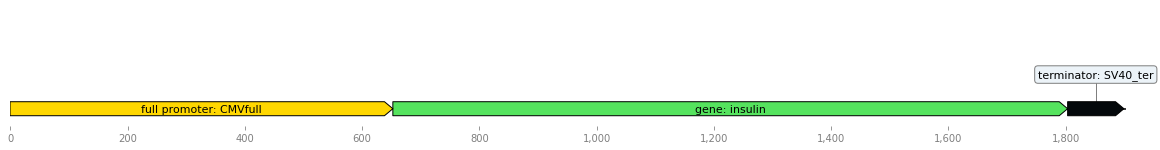

In [18]:
# @markdown # Genetic Assembly
# @markdown Run this section to plot your sequence


def plot_seq(name,seq, btype):

  colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

  length = []
  
  for i in seq:
    length.append(len(i)) 

  features = []
  
  ginitio = 0


  for i in range(len(name)):
    gfinal =  ginitio + len(seq[i]) -1
    features= features + [GraphicFeature(start = ginitio, 
                             end   = gfinal, 
                             strand= +1, 
                             color=colors[i],
                             label= str(btype[i])+": " + name[i])]
    ginitio = gfinal

  record = GraphicRecord(sequence_length=sum(length), features=features)
  record.plot(figure_width=20)

    


names_mammal = [x for x in mammmal.result[0] if x.strip()]
sequences_mammal = [x for x in mammmal.result[1] if x.strip()]
types_mammal = [x for x in mammmal.result[2] if x.strip()]



plot_seq(names_mammal,sequences_mammal,types_mammal)

In [19]:
# @markdown # .GB file format
# @markdown Your sequence is ready! Copy this text and save it in a .gb file so you can view and work with it in SnapGene


name_seq = names_mammal
dna_seq = sequences_mammal
type_seq = types_mammal

colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

full_seq = "".join(dna_seq)
full_name_seq = "_".join(name_seq)

head = ["LOCUS"+"     "+full_name_seq+" "+str(len(full_seq))+" bp ds-DNA     linear",
          "DEFINITION",
          "FEATURES                   Location/Qualifiers"]

def block(type_element, name, pi, pf, col):

  space = " "*(21-len(type_element))
  
  element = ["    "+ str(type_element)+space+str(pi)+".."+str(pf),
             "                         "+"/label="+  str(name),
             "                         "+"/ApEinfo_revcolor="+ str(col),
             "                         "+"/ApEinfo_fwdcolor="+str(col),
             '']
  
  for i in element:
    print(i)
  return element

def split10(s1):
  s10 = [(s1[i:i+10]) for i in range(0, len(s1), 10)]
  srow = " ".join(s10)
  return srow

def origin(seq):

  origin_list = []
  s60 = [(seq[i:i+60]) for i in range(0, len(seq), 60)]

  n = 0
  for i in s60:
    index = n*60 + 1
    space_index = str(index) + " "*(5-len(str(index)))  

    line = space_index + "  "+  split10(i)

    origin_list.append(line)
    print(line)
    n = n+1

  #return origin_list


#with open('/content/drive/MyDrive/Ciclo 9/AutoPython/Archivos Importantes/Example1.gbtxt', 'w') as writefile:
#    writefile.write("This is line A\n")
#    writefile.write("This is line B\n")

for i in head:
  print(i)

pinitio = 1
for i in range(len(dna_seq)):
  
  pfinal =  pinitio + len(dna_seq[i]) -1
  block(type_seq[i], name_seq[i],pinitio, pfinal, colors[i])
  pinitio = pfinal+1

print("ORIGIN")
origin(full_seq)


LOCUS     CMVfull_insulin_SV40_ter 1903 bp ds-DNA     linear
DEFINITION
FEATURES                   Location/Qualifiers
    full promoter        1..654
                         /label=CMVfull
                         /ApEinfo_revcolor=#FFD700
                         /ApEinfo_fwdcolor=#FFD700

    gene                 655..1806
                         /label=insulin
                         /ApEinfo_revcolor=#55E35E
                         /ApEinfo_fwdcolor=#55E35E

    terminator           1807..1903
                         /label=SV40_ter
                         /ApEinfo_revcolor=#04080B
                         /ApEinfo_fwdcolor=#04080B

ORIGIN
1      CGATGTACGG GCCAGATATA CGCGTTGACA TTGATTATTG CCTAGTTATT AATAGTAATC
61     AATTACGGGG TCATTAGTTC ATAGCCCATA TATGGAGTTC CGCGTTACAT AACTTACGGT
121    AAATGGCCCG CCTGGCTGAC CGCCCAACGA CCCCCGCCCA TTGACGTCAA TAATGACGTA
181    TGTTCCCATA GTAACGCCAA TAGGGACTTT CCATTGACGT CAATGGGTGG AGTATTTACG
241    GTAAACTGCC CACTTGGCAG TACATCAAGT GTATCATAT

# CRISPR (Gene editing tool)

In [20]:
# @markdown # Run to show widget
# @markdown Select the components and do not forget to press OK


# ------------------------SELECTION-----------------------------------------------------------
ch_fullW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

# PROMOTER SECTION ####################################################################

# ##################################################################Constitutive Option

tab_promoter_constitutiveW = widgets.Dropdown(
    options= d1['eukaryote(plant)']['prom']['fullpro'].keys(),
    description='Full:',
    disabled = False
)

#     To join previous optionsselect_promoter
tab_promoter_constitutive = HBox(children=[ch_fullW,
                                           tab_promoter_constitutiveW])


# #######################################################################    Free Option
tab_promoter_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_promoter_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)




tab_promoter_free = HBox([ch_freeW,
                                        tab_promoter_free_nameW,
                                        tab_promoter_free_seqW])



tab2 = widgets.Accordion(children=[tab_promoter_constitutive,
                                    tab_promoter_free])

tab2.set_title(0, 'Select promoter (Cas9&gRNA)')
tab2.set_title(1, 'Free Promoter (Cas9&gRNA)')



# spacer SELECTION ####################################################################

ch_gene_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)


tab_gene_free_nameW = widgets.Text(
    placeholder='Insert guide sequence name',
    description='Name:',
    disabled=False
)

tab_gene_free_seqW = widgets.Textarea(
    placeholder='Insert guide sequence',
    description='Sequence:',
    disabled=False
)

tab_gene = HBox([ch_gene_freeW , tab_gene_free_nameW , tab_gene_free_seqW])

# TERMINATOR SELECTION ####################################################################

ch_term_optionsW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_term_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

# ---------------------------------------------------------------------------

tab_term_selectionW = widgets.Dropdown(
    options=d1['eukaryote(plant)']['term'].keys(),
    #rows=10,
    description='Terminator:',
    disabled=False
)


tab_term_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

tab_term_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False
)


term_list = HBox([ch_term_optionsW, tab_term_selectionW ])
term_free = HBox([ch_term_freeW, tab_term_free_nameW, tab_term_free_seqW  ])

tab_terminator = VBox([term_list , term_free])






###########################################################  FINAL FUNCTION

def function_promoter(ch_full, 
                      ch_free,

                      tab_promoter_constitutive,

                      tab_promoter_free_name,
                      tab_promoter_free_seq,
                                           
                      ch_gene_free,

                      tab_gene_free_name,
                      tab_gene_free_seq,
                      
                      ch_term_options ,
                      ch_term_free ,

                      tab_term_selection ,
                      tab_term_free_name,
                      tab_term_free_seq):

  name_promoter = ['']
  seq_promoter = ['']



  name_gRNA = ['']  
  seq_gRNA = ['']

  name_term  = ['']
  seq_term = ['']
  
  # ------------------PROMOTER--------------------------------------------------
  if ch_full == True and ch_free == False:
    seq_promoter = [d1['eukaryote(plant)']['prom']['fullpro'][tab_promoter_constitutive]]
    name_promoter = [tab_promoter_constitutive]
    
    type_promoter = ['full promoter']

  
  elif ch_full == False and ch_free == True:
    name_promoter = [tab_promoter_free_name]
    seq_promoter = [tab_promoter_free_seq]
    type_promoter = ['full promoter']

  else:
    name_promoter = ['']
    seq_promoter = ['']
    type_promoter = ['']

  # ------------------Gene--------------------------------------------------
  
  if ch_gene_free == True:
    name_gRNA = [tab_gene_free_name]  
    seq_gRNA = [tab_gene_free_seq]
    type_gRNAe = ['guide']
  else:
    name_gRNA = ['']  
    seq_gRNA = ['']
    type_gRNA = ['']


  # ------------------TERMINATOR--------------------------------------------------
  if ch_term_options == True and ch_term_free == False :
    name_term = [tab_term_selection]
    seq_term = [d1['eukaryote(plant)']['term'][tab_term_selection]]
    type_term = ['terminator']

  elif ch_term_options == False and ch_term_free == True:
    name_term = [tab_term_free_name]
    seq_term = [tab_term_free_seq]
    type_term = ['terminator']

  else:
    name_term  = ['']
    seq_term = ['']
    type_term = ['']


  cas9_gene = d1['eukaryote(plant)']['gene']['Cas9']
  scaffold_seq = d1['eukaryote(plant)']['other']['scaffold']

  X = name_promoter+ ['Cas9'] + name_term   + name_promoter +name_gRNA + ['scaffold'] + name_term
  Y = seq_promoter + [cas9_gene] + seq_term + seq_promoter  + seq_gRNA + [scaffold_seq] + seq_term
  Z = type_promoter+  ['gene'] +  type_term + type_promoter + ['guide']+ ['other']+  type_term
  
  print(X,Y,Z)

  return X,Y,Z




crispr = widgets.interactive(function_promoter, 

                        ch_full = ch_fullW,
                        ch_min = ch_minW ,
                        ch_free = ch_freeW, 

                        tab_promoter_constitutive = tab_promoter_constitutiveW,
                        tab_promoter_inducible_box = tab_promoter_inducible_boxW,
                        tab_promoter_inducible_minpromoter = tab_promoter_inducible_minpromoterW,
                        
                        tab_promoter_free_name = tab_promoter_free_nameW,
                        tab_promoter_free_seq = tab_promoter_free_seqW,
                        
                        ch_gene_free = ch_gene_freeW,
                        tab_gene_free_name = tab_gene_free_nameW,
                        tab_gene_free_seq = tab_gene_free_seqW,

                        ch_term_options = ch_term_optionsW,
                        ch_term_free = ch_term_freeW,
                        tab_term_selection = tab_term_selectionW,
                        tab_term_free_name = tab_term_free_nameW,
                        tab_term_free_seq = tab_term_free_seqW
                        )



# TABS ASIGNMENT
tab4 = tab_gene
tab5 = tab_terminator

# Creation to visualizase
tab_nest = widgets.Tab()
tab_nest.children = [ tab2,  tab5,tab4 ] # Agrupar Tabs
tab_nest.set_title(0, 'Promoter')
tab_nest.set_title(1, 'Terminator')
tab_nest.set_title(2, 'Guide')
tab_nest # Mostrar Tab


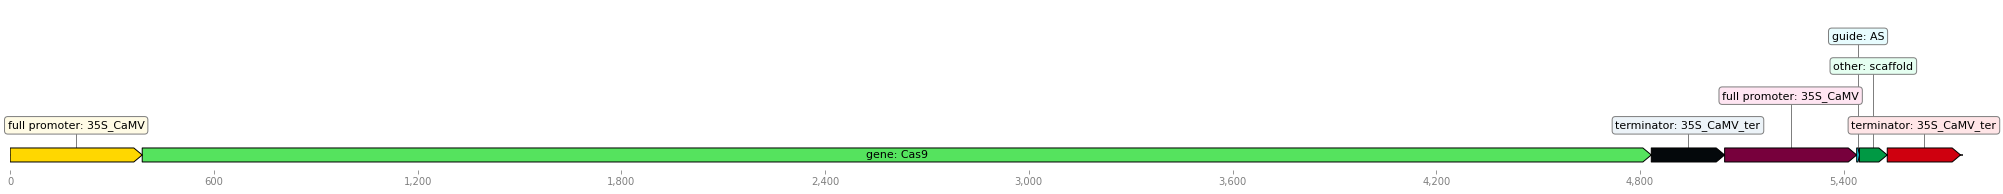

In [21]:
# @markdown # Genetic Assembly
# @markdown Run this section to plot your sequence


def plot_seq(name,seq, btype):

  colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

  length = []
  
  for i in seq:
    length.append(len(i)) 

  features = []
  
  ginitio = 0


  for i in range(len(name)):
    gfinal =  ginitio + len(seq[i]) -1
    features= features + [GraphicFeature(start = ginitio, 
                             end   = gfinal, 
                             strand= +1, 
                             color=colors[i],
                             label= str(btype[i])+": " + name[i])]
    ginitio = gfinal

  record = GraphicRecord(sequence_length=sum(length), features=features)
  record.plot(figure_width=35)

    


names_crispr = [x for x in crispr.result[0] if x.strip()]
sequences_crispr = [x for x in crispr.result[1] if x.strip()]
types_crispr = [x for x in crispr.result[2] if x.strip()]



plot_seq(names_crispr,sequences_crispr,types_crispr)

In [22]:
# @markdown # .GB file format
# @markdown Your sequence is ready! Copy this text and save it in a .gb file so you can view and work with it in SnapGene

name_seq = crispr.result[0]
dna_seq = crispr.result[1]
type_seq = crispr.result[2] 

colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

full_seq = "".join(dna_seq)
full_name_seq = "_".join(name_seq)

head = ["LOCUS"+"     "+full_name_seq+" "+str(len(full_seq))+" bp ds-DNA     linear",
          "DEFINITION",
          "FEATURES                   Location/Qualifiers"]

def block(type_element, name, pi, pf, col):

  space = " "*(21-len(type_element))
  
  element = ["    "+ str(type_element)+space+str(pi)+".."+str(pf),
             "                         "+"/label="+  str(name),
             "                         "+"/ApEinfo_revcolor="+ str(col),
             "                         "+"/ApEinfo_fwdcolor="+str(col),
             '']
  
  for i in element:
    print(i)
  return element

def split10(s1):
  s10 = [(s1[i:i+10]) for i in range(0, len(s1), 10)]
  srow = " ".join(s10)
  return srow

def origin(seq):

  origin_list = []
  s60 = [(seq[i:i+60]) for i in range(0, len(seq), 60)]

  n = 0
  for i in s60:
    index = n*60 + 1
    space_index = str(index) + " "*(5-len(str(index)))  

    line = space_index + "  "+  split10(i)

    origin_list.append(line)
    print(line)
    n = n+1

  #return origin_list


#with open('/content/drive/MyDrive/Ciclo 9/AutoPython/Archivos Importantes/Example1.gbtxt', 'w') as writefile:
#    writefile.write("This is line A\n")
#    writefile.write("This is line B\n")

for i in head:
  print(i)

pinitio = 1
for i in range(len(dna_seq)):
  
  pfinal =  pinitio + len(dna_seq[i]) -1
  block(type_seq[i], name_seq[i],pinitio, pfinal, colors[i])
  pinitio = pfinal+1

print("ORIGIN")
origin(full_seq)


LOCUS     35S_CaMV_Cas9_35S_CaMV_ter_35S_CaMV_AS_scaffold_35S_CaMV_ter 5752 bp ds-DNA     linear
DEFINITION
FEATURES                   Location/Qualifiers
    full promoter        1..390
                         /label=35S_CaMV
                         /ApEinfo_revcolor=#FFD700
                         /ApEinfo_fwdcolor=#FFD700

    gene                 391..4836
                         /label=Cas9
                         /ApEinfo_revcolor=#55E35E
                         /ApEinfo_fwdcolor=#55E35E

    terminator           4837..5053
                         /label=35S_CaMV_ter
                         /ApEinfo_revcolor=#04080B
                         /ApEinfo_fwdcolor=#04080B

    full promoter        5054..5443
                         /label=35S_CaMV
                         /ApEinfo_revcolor=#77003C
                         /ApEinfo_fwdcolor=#77003C

    guide                5444..5452
                         /label=AS
                         /ApEinfo_revcolor=#0ED0E1
        